Required packages:\
pandas==1.4.0\
numpy==1.21.5\
scikit-learn==1.0.2\
tensorflow==2.7.0\
torch==1.10.2\
transformers==4.17.0.dev0\
datasets==1.18.3\
textstat==0.7.2 (if running the ML part)\
xgboost==1.5.2 (if running the ML part)

## Read Data

In [1]:
RUN_DL = True

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data/sample_full.csv")

In [4]:
data.fillna({'Remember': 0, 'Understand': 0, 'Apply': 0, 'Analyze': 0, 'Evaluate': 0, 'Create':0}, inplace=True)

In [5]:
data.dtypes

Learning_outcome     object
Remember            float64
Understand          float64
Apply               float64
Analyze             float64
Evaluate            float64
Create              float64
dtype: object

In [6]:
list(data.columns[1:7])

['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']

In [7]:
data['one_hot_encoded'] = list(data[data.columns[1:]].values)

In [8]:
data.head()

,Learning_outcome,Remember,Understand,Apply,Analyze,Evaluate,Create,one_hot_encoded
0,Analyze the health economic implications of e...,0.0,0.0,0.0,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
1,Apply research skills to operate effectively ...,0.0,0.0,1.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
2,Assess and synthesise diverse information abo...,0.0,0.0,0.0,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]"
3,Describe the general characteristics of the m...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
4,Evaluate the different models of perioperativ...,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"


In [9]:
data['Learning_outcome'] = data['Learning_outcome'].str.lower()

In [10]:
textual_data = data['Learning_outcome'].tolist()

### Some Basic Analysis

In [11]:
from nltk import word_tokenize

In [12]:
lengths = []
for text in textual_data:
    lengths.append(len(word_tokenize(text)))

In [13]:
min(lengths), max(lengths), np.mean(lengths), np.percentile(lengths, 99.5)

(2, 266, 17.808372310570626, 54.0)

In [14]:
np.unique(data['Remember'], return_counts=True)

(array([0., 1.]), array([20195,  1185]))

In [15]:
np.unique(data['Understand'], return_counts=True)

(array([0., 1.]), array([15555,  5825]))

In [16]:
np.unique(data['Apply'], return_counts=True)

(array([0., 1.]), array([15299,  6081]))

In [17]:
np.unique(data['Analyze'], return_counts=True)

(array([0., 1.]), array([17921,  3459]))

In [18]:
np.unique(data['Evaluate'], return_counts=True)

(array([0., 1.]), array([17546,  3834]))

In [19]:
np.unique(data['Create'], return_counts=True)

(array([0., 1.]), array([17493,  3887]))

In [20]:
LIWC_data = pd.read_csv("data/LIWC2015 Results (Learning_outcome.csv).csv")

In [21]:
data = data.join(LIWC_data).drop(['A'], axis=1)

In [22]:
data.head()

,Learning_outcome,Remember,Understand,Apply,Analyze,Evaluate,Create,one_hot_encoded,WC,Analytic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,analyze the health economic implications of e...,0.0,0.0,0.0,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",9,99.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,apply research skills to operate effectively ...,0.0,0.0,1.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",14,99.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,assess and synthesise diverse information abo...,0.0,0.0,0.0,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]",26,43.96,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,describe the general characteristics of the m...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",23,99.00,...,8.7,0.0,0.0,0.0,0.0,4.35,0.0,0.0,0.0,0.0
4,evaluate the different models of perioperativ...,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",10,98.58,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [23]:
data.columns[8:]

Index(['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic',
       'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
       'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend',
       'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve',
       'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC',
       'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype='o

## Undersample - not used

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
def rus(X, Y):
    Y = np.where(Y==1.0, 1, 0)
    r = RandomUnderSampler(random_state=0)
    X = X.to_numpy()
    #X = np.reshape(X, (-1, 1))
    X_resampled, y_resampled = r.fit_resample(X, Y)
    #X_resampled = X_resampled.flatten()
    return X_resampled, y_resampled

## BERT

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, cohen_kappa_score, f1_score
import torch
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel, TrainingArguments, Trainer, AutoModelForSequenceClassification, EarlyStoppingCallback
from datasets import load_metric, list_metrics

In [27]:
# evaluation metric: F1 Score
metric = load_metric("f1")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="macro")

In [28]:
class EncodeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)



def createBERT(dir_name, X, Y, test_X, test_Y, batch_size=64, nepochs=3, patience=10):
    # function to fine-tune BERT with given data and print out performance on the testing set
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', use_cache=False)
    model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, use_cache=False)
    training_args = TrainingArguments(
        output_dir=dir_name,          # output directory
        num_train_epochs=nepochs,              # total number of training epochs
        per_device_train_batch_size=batch_size,  # batch size per device during training
        per_device_eval_batch_size=batch_size,   # batch size for evaluation
        warmup_steps=5,                # number of warmup steps for learning rate scheduler
        weight_decay=0.05,               # strength of weight decay
        logging_dir='./logs',            # directory for storing logs
        logging_steps=10,
        metric_for_best_model="f1",
        evaluation_strategy="steps",
        save_strategy="steps",
        save_steps=10,
        load_best_model_at_end=True,
        save_total_limit=3
    )
    train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.2, random_state=666, stratify=Y)

    train_encoded = tokenizer(train_x, truncation=True, padding=True, max_length=55)
    val_encoded = tokenizer(val_x, truncation=True, padding=True, max_length=55)
    test_encoded = tokenizer(test_X, truncation=True, padding=True, max_length=55)

    train_set = EncodeDataset(train_encoded, train_y)
    val_set = EncodeDataset(val_encoded, val_y)
    test_set = EncodeDataset(test_encoded, test_Y)
    trainer = Trainer(model=model, args=training_args, train_dataset=train_set, eval_dataset=val_set, compute_metrics=compute_metrics, callbacks=[EarlyStoppingCallback(early_stopping_patience=patience)])
    print("Started training model for column", dir_name)
    trainer.train()
    trainer.save_model()
    print("Training Completed. Started testing...")
    predicted = trainer.predict(test_set)
    predicted_result = np.argmax(predicted.predictions, axis=-1)
    print("Accuracy Score -> ", accuracy_score(test_Y, predicted_result))
    print("Kappa Score -> ", cohen_kappa_score(test_Y, predicted_result))
    print("ROC AUC Score -> ", roc_auc_score(test_Y, predicted_result))
    print("F1 Score -> ", f1_score(test_Y, predicted_result))
    print("Classification report -> \n", classification_report(test_Y, predicted_result))
    return trainer

In [29]:
remember_bert = None
understand_bert = None
apply_bert = None
analyze_bert = None
evaluate_bert = None
create_bert = None

## ML Libraries

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [31]:
import textstat
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import metrics

In [33]:
import matplotlib.pyplot as plt

In [34]:
def generateX(data_x, test_x, textual_column_index, start_index_LIWC, end_index_LIWC):
    # generating ML features based on previous literature
    column_names = []
    print("Getting Unigram...")
    uni_cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=1000)
    unigram = uni_cv.fit_transform(data_x[:, textual_column_index])
    unigram = unigram.toarray()
    unigram_test = uni_cv.transform(test_x[:,textual_column_index]).toarray()
    temp = uni_cv.get_feature_names_out().tolist()
    column_names += ["uni_"+name for name in temp]
    print("Getting Bigram...")
    bi_cv = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    bigram = bi_cv.fit_transform(data_x[:, textual_column_index])
    bigram = bigram.toarray()
    bigram_test = bi_cv.transform(test_x[:, textual_column_index]).toarray()
    temp = bi_cv.get_feature_names_out().tolist()
    column_names += ["bi_"+name for name in temp]
    print("Getting Tfidf...")
    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=1000)
    t = tfidf.fit_transform(data_x[:, textual_column_index])
    t = t.toarray()
    t_test = tfidf.transform(test_x[:, textual_column_index]).toarray()
    temp = tfidf.get_feature_names_out().tolist()
    column_names += ["tfidf_"+name for name in temp]
    print("Getting ARI...")
    ari = [textstat.automated_readability_index(text) for text in data_x[:, textual_column_index]]
    ari_test = [textstat.automated_readability_index(text) for text in test_x[:, textual_column_index]]
    column_names.append("ari")
    combined_data_x = []
    combined_test_x = []
    print("Combining...")
    for i in range(len(data_x)):
        combined_data_x.append(unigram[i].tolist()
                              + bigram[i].tolist()
                              + t[i].tolist()
                              + [ari[i]]
                              + data_x[i, start_index_LIWC:end_index_LIWC].tolist())
    for i in range(len(test_x)):
        combined_test_x.append(unigram_test[i].tolist()
                              + bigram_test[i].tolist()
                              + t_test[i].tolist()
                              + [ari_test[i]]
                              + test_x[i, start_index_LIWC:end_index_LIWC].tolist())
    print("Generated feature shape is", np.array(combined_data_x).shape)
    print("Generated test feature is", np.array(combined_test_x).shape)
    return combined_data_x, column_names, combined_test_x

In [35]:
def performancePrinter(test_y, pred_y):
    # performance printer
    print("Accuracy Score -> ", accuracy_score(test_y, pred_y))
    print("Kappa Score -> ", cohen_kappa_score(test_y, pred_y))
    print("ROC AUC Score -> ", roc_auc_score(test_y, pred_y))
    print("F1 Score -> ", f1_score(test_y, pred_y))
    print("Classification report -> \n", classification_report(test_y, pred_y))

#### Grid Search Parameters

In [36]:
params_nb = {'var_smoothing': [1e-8, 1e-9, 1e-10]}

In [37]:
params_svm = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf']}

In [38]:
params_lr = {'penalty': ['l1', 'l2', 'none'],
             'C': [0.1, 1, 10],
             'solver': ['saga'],
             'tol': [0.01, 0.001, 0.0001],
             'max_iter': [200, 500]}

In [39]:
params_rf = {'n_estimators': [50, 100, 250],
             'max_depth': [None, 5, 10],
             'max_features':['auto', 'sqrt'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]}

In [40]:
params_xgb = {'gamma':[0.1, 0.5],
              'learning_rate': [0.1, 0.5],
              'max_depth': [5, 7, 10],
              'n_estimators': [50, 100]}

## Experiment

In [41]:
split_train_x, split_test_x, split_train_y, split_test_y = train_test_split(data.drop(columns=list(data.columns[1:8])), data[data.columns[1:7]], test_size=0.2, random_state=666)

### Remember

#### Data Preparation

In [42]:
remember_x, remember_y = split_train_x.to_numpy(), split_train_y['Remember'].astype('long').to_numpy()#rus(split_train_x, split_train_y['Remember'].to_numpy())

In [43]:
remember_x.shape, remember_y.shape

((17104, 94), (17104,))

#### BERT Experiment

In [54]:
remember_x_bert = remember_x[:, 0].tolist()

In [55]:
if RUN_DL:
    remember_bert = createBERT('remember', remember_x_bert, remember_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Remember'].astype('long').to_numpy(), 64)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Started training model for column remember


Step,Training Loss,Validation Loss,F1
10,0.429400,0.220046,0.485719
20,0.150900,0.202605,0.485719
30,0.159900,0.111501,0.822688
40,0.109400,0.108962,0.823905
50,0.117200,0.084652,0.845506
60,0.067900,0.077134,0.858652
70,0.066000,0.074709,0.884382
80,0.052700,0.092848,0.861487
90,0.088100,0.070787,0.872400
100,0.100400,0.066905,0.900992


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to remember/checkpoint-10
Configuration saved in remember/checkpoint-10/config.json
Model weights saved in remember/checkpoint-10/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to remember/checkpoint-20
Configuration saved in remember/checkpoint-20/config.json
Model weights saved in remember/checkpoint-20/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to remember/checkpoint-30
Configuration saved in remember/checkpoint-30/config.json
Model weights saved in remember/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to remember/checkpoint-40
Configuration saved in remember/checkpoint-40/config.json
Model weights saved in remember/checkpoint-40/pytorch_model.bin
***** Running Evaluation ***

Saving model checkpoint to remember
Configuration saved in remember/config.json
Model weights saved in remember/pytorch_model.bin
***** Running Prediction *****
  Num examples = 4276
  Batch size = 64


Training Completed. Started testing...


Accuracy Score ->  0.9871375116931712
Kappa Score ->  0.8712781329363342
ROC AUC Score ->  0.9157408306981614
F1 Score ->  0.8780487804878049
Classification report -> 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4039
           1       0.93      0.84      0.88       237

    accuracy                           0.99      4276
   macro avg       0.96      0.92      0.94      4276
weighted avg       0.99      0.99      0.99      4276



#### Traditional ML Algorithm

In [56]:
combined_remember_x, column_names_remember, test_remember_x = generateX(remember_x, split_test_x.to_numpy(), 0, 1, 94)
train_remember_x = combined_remember_x
train_remember_y = remember_y
test_remember_y = split_test_y['Remember'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [57]:
column_names_remember += data.columns[8:].tolist()

##### Naive Bayes

In [58]:
gnb_remember = GaussianNB()
gnb_remember_gs = GridSearchCV(gnb_remember, params_nb, scoring="f1", n_jobs=-1, cv=3, verbose=3)
gnb_remember_gs.fit(train_remember_x, train_remember_y)
pred_remember_y_gnb = gnb_remember_gs.predict(test_remember_x)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZ

In [59]:
gnb_remember_gs.best_params_

{'var_smoothing': 1e-08}

In [60]:
performancePrinter(test_remember_y, pred_remember_y_gnb)

Accuracy Score ->  0.6396164639850327
Kappa Score ->  0.11147063503407495
ROC AUC Score ->  0.7158971128543117
F1 Score ->  0.1978136387298282
Classification report -> 
               precision    recall  f1-score   support

           0       0.98      0.63      0.77      4039
           1       0.11      0.80      0.20       237

    accuracy                           0.64      4276
   macro avg       0.55      0.72      0.48      4276
weighted avg       0.93      0.64      0.74      4276



##### Support Vector Machine

In [61]:
svm_remember = SVC()
svm_remember_gs = GridSearchCV(svm_remember, params_svm, scoring="f1", n_jobs=-1, cv=3, verbose=3)
svm_remember_gs.fit(train_remember_x, train_remember_y)
pred_remember_y_svm = svm_remember_gs.predict(test_remember_x)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [62]:
svm_remember_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [63]:
performancePrinter(test_remember_y, pred_remember_y_svm)

Accuracy Score ->  0.9815247895229187
Kappa Score ->  0.8273257585206419
ROC AUC Score ->  0.9226993563807726
F1 Score ->  0.8371134020618556
Classification report -> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4039
           1       0.82      0.86      0.84       237

    accuracy                           0.98      4276
   macro avg       0.91      0.92      0.91      4276
weighted avg       0.98      0.98      0.98      4276



##### Logistic Regression

In [64]:
lr_remember = LogisticRegression()
lr_remember_gs = GridSearchCV(lr_remember, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_remember_gs.fit(train_remember_x, train_remember_y)
pred_remember_y_lr = lr_remember_gs.predict(test_remember_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
lr_remember_gs.best_params_

{'C': 10, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0001}

In [66]:
performancePrinter(test_remember_y, pred_remember_y_lr)

Accuracy Score ->  0.9597754911131899
Kappa Score ->  0.4849022642751588
ROC AUC Score ->  0.6808208573998452
F1 Score ->  0.5028901734104045
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      4039
           1       0.80      0.37      0.50       237

    accuracy                           0.96      4276
   macro avg       0.88      0.68      0.74      4276
weighted avg       0.95      0.96      0.95      4276



##### Random Forest

In [67]:
rf_remember = RandomForestClassifier()
rf_remember_gs = GridSearchCV(rf_remember, params_rf, scoring="f1", n_jobs=-1, cv=3, verbose=3)
rf_remember_gs.fit(train_remember_x, train_remember_y)
pred_remember_y_rf = rf_remember_gs.predict(test_remember_x)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [68]:
rf_remember_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [69]:
performancePrinter(test_remember_y, pred_remember_y_rf)

Accuracy Score ->  0.9831618334892422
Kappa Score ->  0.8297196396077499
ROC AUC Score ->  0.8917913215348663
F1 Score ->  0.8385650224215246
Classification report -> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4039
           1       0.89      0.79      0.84       237

    accuracy                           0.98      4276
   macro avg       0.94      0.89      0.91      4276
weighted avg       0.98      0.98      0.98      4276



##### XGBoost

In [70]:
xgb_remember = XGBClassifier()
xgb_remember_gs = GridSearchCV(xgb_remember, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_remember_gs.fit(train_remember_x, train_remember_y)
pred_remember_y_xgb = xgb_remember_gs.predict(test_remember_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[04:21:12] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.799 total time= 1.3min
[CV 1/3] END ...C=1, gamma=scale, kernel=linear;, score=0.734 total time= 1.6min
[CV 2/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.5min
[CV 3/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.000 total time= 2.3min
[CV 2/3] END .....C=10, gamma=auto, kernel=poly;, score=0.643 total time= 1.5min
[CV 2/3] END ...C=100, gamma=scale, kernel=poly;, score=0.418 total time= 1.4min
[CV 3/3] END ..C=100, gamma=auto, kernel=linear;, score=0.720 total time= 1.7min
[CV 2/3] END C=0.1, max_

In [71]:
xgb_remember_gs.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [72]:
performancePrinter(test_remember_y, pred_remember_y_xgb)

Accuracy Score ->  0.9808231992516371
Kappa Score ->  0.8197173945011111
ROC AUC Score ->  0.9163702424567219
F1 Score ->  0.8298755186721992
Classification report -> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4039
           1       0.82      0.84      0.83       237

    accuracy                           0.98      4276
   macro avg       0.90      0.92      0.91      4276
weighted avg       0.98      0.98      0.98      4276



### Understand

#### Data Preparation

In [73]:
understand_x, understand_y = split_train_x.to_numpy(), split_train_y['Understand'].astype('long').to_numpy() #rus(split_train_x, split_train_y['Understand'].to_numpy())

In [74]:
understand_x.shape

(17104, 94)

#### BERT Experiment

In [75]:
understand_x_bert = understand_x[:, 0].tolist()

In [76]:
if RUN_DL:
    understand_bert = createBERT('understand', understand_x_bert, understand_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Understand'].astype('long').to_numpy(), 64)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0.dev0",
  "type_vocab_size": 2,
  "use_cache": false,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-un

Started training model for column understand


Step,Training Loss,Validation Loss,F1
10,0.601600,0.486269,0.421835
20,0.402600,0.257279,0.885416
30,0.228600,0.198980,0.913151
40,0.220500,0.200793,0.919804
50,0.191700,0.178525,0.917128
60,0.230800,0.168040,0.921720
70,0.204700,0.158797,0.928188
80,0.134900,0.171044,0.932743
90,0.166900,0.185779,0.914503
100,0.167200,0.171141,0.923408


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64


[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.777 total time= 1.3min
[CV 1/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.453 total time= 1.5min
[CV 2/3] END .....C=1, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 2/3] END ......C=1, gamma=auto, kernel=poly;, score=0.650 total time= 1.5min
[CV 3/3] END ....C=10, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 3/3] END .....C=10, gamma=auto, kernel=poly;, score=0.661 total time= 1.5min
[CV 3/3] END ...C=100, gamma=scale, kernel=poly;, score=0.457 total time= 1.4min
[CV 2/3] END ....C=100, gamma=auto, kernel=poly;, score=0.636 total time= 1.5min
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.030 total time=  17.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.084 total time=  37.4s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.099 total time=  38.1s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1,

Saving model checkpoint to understand/checkpoint-10
Configuration saved in understand/checkpoint-10/config.json
Model weights saved in understand/checkpoint-10/pytorch_model.bin


[CV 3/3] END ...............var_smoothing=1e-08;, score=0.181 total time=   3.0s
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.799 total time= 1.3min
[CV 2/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.418 total time= 1.5min
[CV 3/3] END .....C=1, gamma=scale, kernel=poly;, score=0.000 total time= 1.2min
[CV 3/3] END ......C=1, gamma=auto, kernel=poly;, score=0.699 total time= 1.6min
[CV 1/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.000 total time= 1.4min
[CV 2/3] END ......C=10, gamma=auto, kernel=rbf;, score=0.204 total time= 2.4min
[CV 3/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.306 total time= 1.7min
[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.030 total time=  23.0s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.019 total time=  17.6s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.099 total time=  38.4s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, so

[CV 2/3] END ...............var_smoothing=1e-09;, score=0.193 total time=   3.2s
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.4min
[CV 2/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.000 total time= 2.3min
[CV 2/3] END ....C=1, gamma=auto, kernel=linear;, score=0.745 total time= 1.5min
[CV 3/3] END ..C=10, gamma=scale, kernel=linear;, score=0.720 total time= 1.7min
[CV 1/3] END ......C=10, gamma=auto, kernel=rbf;, score=0.151 total time= 2.4min
[CV 2/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.240 total time= 1.6min
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.343 total time= 1.7min
[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.054 total time=  49.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.019 total time=  18.4s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.095 total time=  38.0s
[CV 2/3] END C=0.1, max_iter=500, penalty

[CV 3/3] END ...............var_smoothing=1e-09;, score=0.180 total time=   2.8s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.796 total time= 1.3min
[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.000 total time= 2.4min
[CV 1/3] END ....C=1, gamma=auto, kernel=linear;, score=0.734 total time= 1.5min
[CV 2/3] END ..C=10, gamma=scale, kernel=linear;, score=0.717 total time= 1.6min
[CV 1/3] END .....C=10, gamma=auto, kernel=poly;, score=0.634 total time= 1.5min
[CV 2/3] END .C=100, gamma=scale, kernel=linear;, score=0.717 total time= 1.6min
[CV 1/3] END ....C=100, gamma=auto, kernel=poly;, score=0.634 total time= 1.5min
[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.054 total time=  49.6s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.084 total time=  38.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.036 total time=  24.9s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, 

[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 2/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.777 total time= 1.4min
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;, score=0.759 total time= 1.5min
[CV 1/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.006 total time= 2.4min
[CV 3/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.000 total time= 1.5min
[CV 1/3] END .C=100, gamma=scale, kernel=linear;, score=0.698 total time= 1.6min
[CV 1/3] END ..C=100, gamma=auto, kernel=linear;, score=0.698 total time= 1.6min
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.036 total time=  23.4s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.072 total time=  37.1s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.095 total time=  38.3s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.258 total time= 2.0min
[CV 3/3] END C=0.1, max_

***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64


[CV 1/3] END ...............var_smoothing=1e-09;, score=0.194 total time=   2.7s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.4min
[CV 3/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.000 total time= 2.3min
[CV 3/3] END ....C=1, gamma=auto, kernel=linear;, score=0.759 total time= 1.6min
[CV 1/3] END ....C=10, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 1/3] END ...C=10, gamma=auto, kernel=linear;, score=0.698 total time= 1.6min
[CV 1/3] END ...C=100, gamma=scale, kernel=poly;, score=0.464 total time= 1.4min
[CV 2/3] END ..C=100, gamma=auto, kernel=linear;, score=0.717 total time= 1.6min
[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.066 total time=  50.4s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.048 total time=  18.6s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.099 total time=  38.0s
[CV 1/3] END C=0.1, max_iter=500, penalty

Saving model checkpoint to understand/checkpoint-20
Configuration saved in understand/checkpoint-20/config.json
Model weights saved in understand/checkpoint-20/pytorch_model.bin


[CV 1/3] END ...............var_smoothing=1e-08;, score=0.195 total time=   2.9s
[CV 1/3] END ...............var_smoothing=1e-10;, score=0.193 total time=   2.7s
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 3/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.450 total time= 1.6min
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.5min
[CV 2/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.000 total time= 2.3min
[CV 2/3] END ...C=10, gamma=auto, kernel=linear;, score=0.717 total time= 1.6min
[CV 3/3] END .C=100, gamma=scale, kernel=linear;, score=0.720 total time= 1.7min
[CV 3/3] END ....C=100, gamma=auto, kernel=poly;, score=0.661 total time= 1.4min
[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.019 total time=  23.1s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.048 total time=  17.7s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001

[CV 3/3] END ...............var_smoothing=1e-10;, score=0.180 total time=   2.6s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.4min
[CV 2/3] END ...C=1, gamma=scale, kernel=linear;, score=0.745 total time= 1.5min
[CV 3/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time= 1.6min
[CV 1/3] END ..C=10, gamma=scale, kernel=linear;, score=0.698 total time= 1.6min
[CV 2/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.000 total time= 1.5min
[CV 3/3] END ......C=10, gamma=auto, kernel=rbf;, score=0.187 total time= 2.4min
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.291 total time= 1.9min
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.093 total time=  50.2s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.078 total time=  37.5s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.257 total time= 2.0min
[CV 2/3] END C=0.1, max_iter=500, penalty=n

[CV 2/3] END ...............var_smoothing=1e-08;, score=0.194 total time=   3.2s
[CV 2/3] END ...............var_smoothing=1e-10;, score=0.191 total time=   2.6s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 1.2min
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.796 total time= 1.4min
[CV 1/3] END .....C=1, gamma=scale, kernel=poly;, score=0.000 total time= 1.3min
[CV 1/3] END ......C=1, gamma=auto, kernel=poly;, score=0.649 total time= 1.5min
[CV 2/3] END ....C=10, gamma=scale, kernel=poly;, score=0.006 total time= 1.2min
[CV 3/3] END ...C=10, gamma=auto, kernel=linear;, score=0.720 total time= 1.7min
[CV 1/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.284 total time= 1.6min
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.289 total time= 2.0min
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.093 total time=  50.1s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.030 tota

***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-30
Configuration saved in understand/checkpoint-30/config.json
Model weights saved in understand/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-40
Configuration saved in understand/checkpoint-40/config.json
Model weights saved in understand/checkpoint-40/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-50
Configuration saved in understand/checkpoint-50/config.json
Model weights saved in understand/checkpoint-50/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-60
Configuration saved in understand/checkpoint-60/config.json
Model weights saved in understand/checkpoint-60/pytorch_model.bin
****

Model weights saved in understand/checkpoint-350/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-360
Configuration saved in understand/checkpoint-360/config.json
Model weights saved in understand/checkpoint-360/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-370
Configuration saved in understand/checkpoint-370/config.json
Model weights saved in understand/checkpoint-370/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-380
Configuration saved in understand/checkpoint-380/config.json
Model weights saved in understand/checkpoint-380/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to understand/checkpoint-390
Configuration saved in understand/checkpoint-390/conf

Training Completed. Started testing...


Accuracy Score ->  0.970533208606174
Kappa Score ->  0.9264205240709017
ROC AUC Score ->  0.9594435413957519
F1 Score ->  0.9467905405405406
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3076
           1       0.96      0.93      0.95      1200

    accuracy                           0.97      4276
   macro avg       0.97      0.96      0.96      4276
weighted avg       0.97      0.97      0.97      4276



#### Traditional ML Algorithm

In [77]:
combined_understand_x, column_names_understand, test_understand_x = generateX(understand_x, split_test_x.to_numpy(), 0, 1, 94)
train_understand_x = combined_understand_x
train_understand_y = understand_y
test_understand_y = split_test_y['Understand'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [78]:
column_names_understand += data.columns[8:].tolist()

##### Naive Bayes

In [79]:
gnb_understand = GaussianNB()
gnb_understand_gs = GridSearchCV(gnb_understand, params_nb, scoring="f1", n_jobs=-1, cv=3, verbose=3)
gnb_understand_gs.fit(train_understand_x, train_understand_y)
pred_understand_y_gnb = gnb_understand_gs.predict(test_understand_x)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZ

In [80]:
gnb_understand_gs.best_params_

{'var_smoothing': 1e-08}

In [81]:
performancePrinter(test_understand_y, pred_understand_y_gnb)

Accuracy Score ->  0.641955098222638
Kappa Score ->  0.3273875303759528
ROC AUC Score ->  0.7158154529692242
F1 Score ->  0.5808924171913495
Classification report -> 
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      3076
           1       0.43      0.88      0.58      1200

    accuracy                           0.64      4276
   macro avg       0.68      0.72      0.63      4276
weighted avg       0.79      0.64      0.66      4276



##### Support Vector Machine

In [82]:
svm_understand = SVC()
svm_understand_gs = GridSearchCV(svm_understand, params_svm, scoring="f1", n_jobs=-1, cv=3, verbose=3)
svm_understand_gs.fit(train_understand_x, train_understand_y)
pred_understand_y_svm = svm_understand_gs.predict(test_understand_x)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ...............var_smoothing=1e-09;, score=0.551 total time=   3.1s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.854 total time= 4.5min
[CV 2/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.800 total time= 4.4min
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.407 total time= 4.5min
[CV 1/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.523 total time= 4.8min
[CV 2/3] END ....C=10, gamma=scale, kernel=poly;, score=0.603 total time= 3.8min
[CV 3/3] END ...C=10, gamma=auto, kernel=linear;, score=0.801 total time=19.5min
[CV 3/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.775 total time= 4.1min
[CV 3/3] END ....C=100, gamma=auto, kernel=poly;, score=0.776 total time= 4.6min
[CV 3/3] END ...............var_smoothing=1e-10;, score=0.546 total time=   2.5s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.000 total time= 4.9min
[CV 1/3] END ...C=1, gamma=scale, kernel=linear;

In [83]:
svm_understand_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [84]:
performancePrinter(test_understand_y, pred_understand_y_svm)

Accuracy Score ->  0.9216557530402245
Kappa Score ->  0.8012661606685524
ROC AUC Score ->  0.8911649328131773
F1 Score ->  0.8547897702644125
Classification report -> 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3076
           1       0.89      0.82      0.85      1200

    accuracy                           0.92      4276
   macro avg       0.91      0.89      0.90      4276
weighted avg       0.92      0.92      0.92      4276



In [ ]:
svm_understand = SVC(C=0.1, gamma='scale', kernel='linear')
svm_understand.fit(train_understand_x, train_understand_y)
pred_understand_y = svm_understand.predict(test_understand_x)
performancePrinter(test_understand_y, pred_understand_y)

##### Logistic Regression

In [85]:
lr_understand = LogisticRegression()
lr_understand_gs = GridSearchCV(lr_understand, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_understand_gs.fit(train_understand_x, train_understand_y)
pred_understand_y_lr = lr_understand_gs.predict(test_understand_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKE

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

In [86]:
lr_understand_gs.best_params_

{'C': 1, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.001}

In [87]:
performancePrinter(test_understand_y, pred_understand_y_lr)

Accuracy Score ->  0.8905519176800748
Kappa Score ->  0.7141064411940176
ROC AUC Score ->  0.8385435630689206
F1 Score ->  0.7868852459016394
Classification report -> 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3076
           1       0.87      0.72      0.79      1200

    accuracy                           0.89      4276
   macro avg       0.88      0.84      0.86      4276
weighted avg       0.89      0.89      0.89      4276



##### Random Forest

In [88]:
rf_understand = RandomForestClassifier()
rf_understand_gs = GridSearchCV(rf_understand, params_rf, scoring="f1", n_jobs=-1, cv=3, verbose=3)
rf_understand_gs.fit(train_understand_x, train_understand_y)
pred_understand_y_rf = rf_understand_gs.predict(test_understand_x)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [89]:
rf_understand_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [90]:
performancePrinter(test_understand_y, pred_understand_y_rf)

Accuracy Score ->  0.9197848456501403
Kappa Score ->  0.7926343798689639
ROC AUC Score ->  0.8796998266146511
F1 Score ->  0.8465324384787473
Classification report -> 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      3076
           1       0.91      0.79      0.85      1200

    accuracy                           0.92      4276
   macro avg       0.92      0.88      0.90      4276
weighted avg       0.92      0.92      0.92      4276



##### XGBoost

In [91]:
xgb_understand = XGBClassifier()
xgb_understand_gs = GridSearchCV(xgb_understand, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_understand_gs.fit(train_understand_x, train_understand_y)
pred_understand_y_xgb = xgb_understand_gs.predict(test_understand_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[09:23:13] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.673 total time=  54.6s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.589 total time=  16.6s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.679 total time=  37.6s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.587 total time=  16.3s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.763 total time= 1.4min
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.575 total time=  23.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.608 total time=  16.0s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.694 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.695 total time=  37.8s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.617 total time=  16.7s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.749 total time= 1.5min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.620 total time=  17.1s
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.609 total time=  33.7s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.677 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.693 tot

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.662 total time=  54.8s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.609 total time=  16.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.694 total time=  37.6s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.608 total time=  16.3s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.759 total time= 1.5min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.589 total time=  17.2s
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.765 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.679 total time=  36.4s
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.695 total time=  36.4s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.6

[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.588 total time=  16.4s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.690 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.696 total time=  37.0s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.738 total time= 2.2min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.765 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.589 total time=  16.4s
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.692 total time=  36.4s
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.609 total time=  16.8s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.680 total time=  36.6s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.765 t

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.593 total time=  24.8s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.678 total time=  36.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.693 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.744 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.768 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.692 total time= 1.4min
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.749 total time= 3.5min
[CV 3/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.765 total time= 1.5min
[CV 1/3] END C=10, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.590 total time=  16.4s
[CV 3/3] END C=10, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.695 to

In [92]:
xgb_understand_gs.best_params_

{'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}

In [93]:
performancePrinter(test_understand_y, pred_understand_y_xgb)

Accuracy Score ->  0.9282039289055192
Kappa Score ->  0.8182551703323023
ROC AUC Score ->  0.9002904204594712
F1 Score ->  0.8673866090712743
Classification report -> 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3076
           1       0.90      0.84      0.87      1200

    accuracy                           0.93      4276
   macro avg       0.92      0.90      0.91      4276
weighted avg       0.93      0.93      0.93      4276



### Apply

#### Data Preparation

In [94]:
apply_x, apply_y = split_train_x.to_numpy(), split_train_y['Apply'].astype('long').to_numpy()#rus(split_train_x, split_train_y['Apply'].to_numpy())

In [95]:
apply_x.shape

(17104, 94)

#### BERT Experiment

In [96]:
apply_x_bert = apply_x[:, 0].tolist()

In [97]:
if RUN_DL:    
    apply_bert = createBERT('apply', apply_x_bert, apply_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Apply'].astype('long').to_numpy(), 64)

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.662 total time=  54.0s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.690 total time=  37.0s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.594 total time=  25.6s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.748 total time= 1.4min
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.764 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.688 total time= 1.4min
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.589 total time=  16.6s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.695 total time=  36.6s
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.749 total time= 3.5min
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.609 tota

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0.dev0",
  "type_vocab_size": 2,
  "use_cache": false,
  "vocab_size": 30522
}



[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.598 total time=  23.5s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.617 total time=  16.5s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.679 total time=  37.0s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.599 total time=  24.6s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.744 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.768 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.620 total time=  16.8s
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.679 total time=  37.0s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.679 total time=  36.3s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.765 tot

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /Users/ylii0447/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /Users/ylii0447/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accef

Started training model for column apply


Step,Training Loss,Validation Loss,F1
10,0.579700,0.477144,0.644891
20,0.403300,0.365935,0.819933
30,0.311400,0.268655,0.887379
40,0.288300,0.272360,0.882373
50,0.304500,0.227896,0.904492
60,0.287900,0.211766,0.913097
70,0.209600,0.181607,0.924221
80,0.214500,0.180069,0.921146
90,0.192000,0.178776,0.923498
100,0.225000,0.185473,0.912232


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64


[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.671 total time=  54.2s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.620 total time=  17.3s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.575 total time=  25.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.748 total time= 2.2min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.751 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.609 total time=  16.3s
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.695 total time=  36.4s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.620 total time=  16.6s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.695 total time=  37.2s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.590 to

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.671 total time=  54.6s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.694 total time=  37.2s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.738 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.607 total time=  17.2s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.587 total time=  34.5s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.616 total time=  35.6s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.677 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.694 total time=  36.2s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.762 total time= 3.6min
[CV 1/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.679 total

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.673 total time=  54.9s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.679 total time=  37.4s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.748 total time= 2.2min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.751 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.689 total time= 1.4min
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.587 total time=  35.5s
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.610 total time=  16.3s
[CV 3/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.764 total time= 1.5min
[CV 1/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.589 total time=  16.1s
[CV 3/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.620 total

Saving model checkpoint to apply/checkpoint-10
Configuration saved in apply/checkpoint-10/config.json
Model weights saved in apply/checkpoint-10/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-20
Configuration saved in apply/checkpoint-20/config.json
Model weights saved in apply/checkpoint-20/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-30
Configuration saved in apply/checkpoint-30/config.json
Model weights saved in apply/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-40
Configuration saved in apply/checkpoint-40/config.json
Model weights saved in apply/checkpoint-40/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-50
Configuration sav

***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-360
Configuration saved in apply/checkpoint-360/config.json
Model weights saved in apply/checkpoint-360/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-370
Configuration saved in apply/checkpoint-370/config.json
Model weights saved in apply/checkpoint-370/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-380
Configuration saved in apply/checkpoint-380/config.json
Model weights saved in apply/checkpoint-380/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to apply/checkpoint-390
Configuration saved in apply/checkpoint-390/config.json
Model weights saved in apply/checkpoint-390/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421

Training Completed. Started testing...


Accuracy Score ->  0.9609448082319925
Kappa Score ->  0.9039256259501931
ROC AUC Score ->  0.9514028637770897
F1 Score ->  0.9311907704985579
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3060
           1       0.93      0.93      0.93      1216

    accuracy                           0.96      4276
   macro avg       0.95      0.95      0.95      4276
weighted avg       0.96      0.96      0.96      4276



#### Traditional ML Algorithm

In [98]:
combined_apply_x, column_names_apply, test_apply_x = generateX(apply_x, split_test_x.to_numpy(), 0, 1, 94)
train_apply_x = combined_apply_x
train_apply_y = apply_y
test_apply_y = split_test_y['Apply'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [99]:
column_names_apply += data.columns[8:].tolist()

##### Naive Bayes

In [100]:
gnb_apply = GaussianNB()
gnb_apply_gs = GridSearchCV(gnb_apply, params_nb, scoring="f1", n_jobs=-1, cv=3, verbose=3)
gnb_apply_gs.fit(train_apply_x, train_apply_y)
pred_apply_y_gnb = gnb_apply_gs.predict(test_apply_x)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZ

In [101]:
gnb_apply_gs.best_params_

{'var_smoothing': 1e-08}

In [102]:
performancePrinter(test_apply_y, pred_apply_y_gnb)

Accuracy Score ->  0.7778297474275023
Kappa Score ->  0.5071471070401455
ROC AUC Score ->  0.780842578259374
F1 Score ->  0.6685275645498953
Classification report -> 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      3060
           1       0.58      0.79      0.67      1216

    accuracy                           0.78      4276
   macro avg       0.74      0.78      0.75      4276
weighted avg       0.81      0.78      0.79      4276



##### Support Vector Machine

In [103]:
svm_apply = SVC()
svm_apply_gs = GridSearchCV(svm_apply, params_svm, scoring="f1", n_jobs=-1, cv=3, verbose=3)
svm_apply_gs.fit(train_apply_x, train_apply_y)
pred_apply_y_svm = svm_apply_gs.predict(test_apply_x)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 4.7min
[CV 3/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.784 total time= 4.6min
[CV 2/3] END .....C=1, gamma=scale, kernel=poly;, score=0.009 total time= 4.4min
[CV 1/3] END ......C=1, gamma=auto, kernel=poly;, score=0.832 total time= 5.4min
[CV 3/3] END ..C=10, gamma=scale, kernel=linear;, score=0.807 total time=23.7min
[CV 2/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.800 total time= 4.6min
[CV 3/3] END ....C=100, gamma=auto, kernel=poly;, score=0.797 total time= 5.0min
[CV 1/3] END ...............var_smoothing=1e-08;, score=0.643 total time=   3.2s
[CV 2/3] END ...............var_smoothing=1e-10;, score=0.609 total time=   2.7s
[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 4.6min
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.850 total time= 4.6min
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;

In [104]:
svm_apply_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [105]:
performancePrinter(test_apply_y, pred_apply_y_svm)

Accuracy Score ->  0.9230589335827877
Kappa Score ->  0.8050196892409649
ROC AUC Score ->  0.8902423030615756
F1 Score ->  0.8575140753572976
Classification report -> 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3060
           1       0.91      0.81      0.86      1216

    accuracy                           0.92      4276
   macro avg       0.92      0.89      0.90      4276
weighted avg       0.92      0.92      0.92      4276



##### Logistic Regression

In [106]:
lr_apply = LogisticRegression()
lr_apply_gs = GridSearchCV(lr_apply, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_apply_gs.fit(train_apply_x, train_apply_y)
pred_apply_y_lr = lr_apply_gs.predict(test_apply_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKE

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

In [107]:
lr_apply_gs.best_params_

{'C': 0.1, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0001}

In [108]:
performancePrinter(test_apply_y, pred_apply_y_lr)

Accuracy Score ->  0.8961646398503275
Kappa Score ->  0.7255734997883849
ROC AUC Score ->  0.8372570519435845
F1 Score ->  0.793296089385475
Classification report -> 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3060
           1       0.91      0.70      0.79      1216

    accuracy                           0.90      4276
   macro avg       0.90      0.84      0.86      4276
weighted avg       0.90      0.90      0.89      4276



##### Random Forest

In [109]:
rf_apply = RandomForestClassifier()
rf_apply_gs = GridSearchCV(rf_apply, params_rf, scoring="f1", n_jobs=-1, cv=3, verbose=3)
rf_apply_gs.fit(train_apply_x, train_apply_y)
pred_apply_y_rf = rf_apply_gs.predict(test_apply_x)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [110]:
rf_apply_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [111]:
performancePrinter(test_apply_y, pred_apply_y_rf)

Accuracy Score ->  0.9359214218896165
Kappa Score ->  0.837073864268455
ROC AUC Score ->  0.9044327270381837
F1 Score ->  0.8806620209059234
Classification report -> 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3060
           1       0.94      0.83      0.88      1216

    accuracy                           0.94      4276
   macro avg       0.94      0.90      0.92      4276
weighted avg       0.94      0.94      0.93      4276



##### XGBoost

In [112]:
xgb_apply = XGBClassifier()
xgb_apply_gs = GridSearchCV(xgb_apply, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_apply_gs.fit(train_apply_x, train_apply_y)
pred_apply_y_xgb = xgb_apply_gs.predict(test_apply_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[14:10:14] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.719 total time=  55.2s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.598 total time=  15.5s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.726 total time=  37.0s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.597 total time=  15.8s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.789 total time= 1.2min
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.719 total time=  55.9s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.748 total time=  37.0s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.768 total time= 1.9min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.773 total time= 1.3min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.725 total time= 1.4min
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.738 total time=  37.3s
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.779 total time= 3.5min
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.623 total time=  25.3s
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.747 total time= 1.0min
[CV 3/3] END C=10, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.61

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.740 total time=  55.3s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.616 total time=  15.5s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.608 total time=  24.5s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.772 total time= 2.2min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.621 total time=  32.3s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.725 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.748 total time=  37.8s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.615 total time=  33.6s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.772 total time= 1.3min
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.801 total tim

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.717 total time=  55.4s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.746 total time=  36.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.603 total time=  24.8s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.766 total time= 1.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.796 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.748 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.622 total time=  16.0s
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.748 total time=  37.5s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.597 total time=  15.6s
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.794 total

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.602 total time=  23.5s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.725 total time=  36.8s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.726 total time=  36.9s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.782 total time= 1.9min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.614 total time=  16.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.801 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.616 total time=  15.8s
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.726 total time=  36.6s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.726 total time=  37.0s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.794 

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.586 total time=  23.5s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.621 total time=  15.5s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.734 total time=  36.3s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.748 total time=  37.5s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.621 total time=  15.7s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.771 total time= 1.2min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.599 total time=  16.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.776 total time= 1.3min
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.737 total time= 1.4min
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.597 

In [113]:
xgb_apply_gs.best_params_

{'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}

In [114]:
performancePrinter(test_apply_y, pred_apply_y_xgb)

Accuracy Score ->  0.9375584658559402
Kappa Score ->  0.8436813525347704
ROC AUC Score ->  0.914001225490196
F1 Score ->  0.886720407297412
Classification report -> 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3060
           1       0.92      0.86      0.89      1216

    accuracy                           0.94      4276
   macro avg       0.93      0.91      0.92      4276
weighted avg       0.94      0.94      0.94      4276



### Analyze

#### Data Preparation

In [42]:
analyze_x, analyze_y = split_train_x.to_numpy(), split_train_y['Analyze'].astype('long').to_numpy()#rus(split_train_x, split_train_y['Analyze'].to_numpy())

In [43]:
analyze_x.shape

(17104, 94)

#### BERT Experiment

In [44]:
analyze_x_bert = analyze_x[:, 0].tolist()

In [56]:
if RUN_DL:
    analyze_bert = createBERT('analyze', analyze_x_bert, analyze_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Analyze'].astype('long').to_numpy(), 64)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0.dev0",
  "type_vocab_size": 2,
  "use_cache": false,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-un

Started training model for column analyze


Step,Training Loss,Validation Loss,F1
10,0.460200,0.417760,0.456121
20,0.346400,0.239997,0.832641
30,0.235700,0.251619,0.855708
40,0.233000,0.177261,0.900010
50,0.146900,0.169113,0.914895
60,0.215400,0.161445,0.904203
70,0.201500,0.153569,0.903113
80,0.118800,0.138027,0.919957
90,0.144000,0.148672,0.911634
100,0.131200,0.159262,0.907976


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-10
Configuration saved in analyze/checkpoint-10/config.json
Model weights saved in analyze/checkpoint-10/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-20
Configuration saved in analyze/checkpoint-20/config.json
Model weights saved in analyze/checkpoint-20/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-30
Configuration saved in analyze/checkpoint-30/config.json
Model weights saved in analyze/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-40
Configuration saved in analyze/checkpoint-40/config.json
Model weights saved in analyze/checkpoint-40/pytorch_model.bin
***** Running Evaluation *****
  Num exa

***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-350
Configuration saved in analyze/checkpoint-350/config.json
Model weights saved in analyze/checkpoint-350/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-360
Configuration saved in analyze/checkpoint-360/config.json
Model weights saved in analyze/checkpoint-360/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-370
Configuration saved in analyze/checkpoint-370/config.json
Model weights saved in analyze/checkpoint-370/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to analyze/checkpoint-380
Configuration saved in analyze/checkpoint-380/config.json
Model weights saved in analyze/checkpoint-380/pytorch_model.bin
***** Running Evaluation ***

Training Completed. Started testing...


Accuracy Score ->  0.974508886810103
Kappa Score ->  0.9064189075232063
ROC AUC Score ->  0.9503508474407191
F1 Score ->  0.9216391085549963
Classification report -> 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3575
           1       0.93      0.91      0.92       701

    accuracy                           0.97      4276
   macro avg       0.96      0.95      0.95      4276
weighted avg       0.97      0.97      0.97      4276



#### Traditional ML Algorithm

In [44]:
combined_analyze_x, column_names_analyze, test_analyze_x = generateX(analyze_x, split_test_x.to_numpy(), 0, 1, 94)
train_analyze_x = combined_analyze_x
train_analyze_y = analyze_y
test_analyze_y = split_test_y['Analyze'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [45]:
column_names_analyze += data.columns[8:].tolist()

##### Naive Bayes

In [46]:
gnb_analyze = GaussianNB()
gnb_analyze_gs = GridSearchCV(gnb_analyze, params_nb, scoring="f1", n_jobs=-1, cv=3, verbose=3)
gnb_analyze_gs.fit(train_analyze_x, train_analyze_y)
pred_analyze_y_gnb = gnb_analyze_gs.predict(test_analyze_x)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [47]:
gnb_analyze_gs.best_params_

{'var_smoothing': 1e-08}

In [48]:
performancePrinter(test_analyze_y, pred_analyze_y_gnb)

Accuracy Score ->  0.5493451824134705
Kappa Score ->  0.1829401988743411
ROC AUC Score ->  0.6840435741149008
F1 Score ->  0.3915377328702242
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.48      0.64      3575
           1       0.25      0.88      0.39       701

    accuracy                           0.55      4276
   macro avg       0.60      0.68      0.52      4276
weighted avg       0.84      0.55      0.60      4276



##### Support Vector Machine

In [49]:
svm_analyze = SVC()
svm_analyze_gs = GridSearchCV(svm_analyze, params_svm, scoring="f1", n_jobs=-1, cv=3, verbose=3)
svm_analyze_gs.fit(train_analyze_x, train_analyze_y)
pred_analyze_y_svm = svm_analyze_gs.predict(test_analyze_x)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 3/3] END ...............var_smoothing=1e-09;, score=0.360 total time=   2.7s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.829 total time= 2.6min
[CV 2/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.856 total time= 2.7min
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;, score=0.825 total time= 3.8min
[CV 2/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.108 total time= 4.0min
[CV 3/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.181 total time= 2.9min
[CV 1/3] END ......C=10, gamma=auto, kernel=rbf;, score=0.552 total time= 4.5min
[CV 3/3] END ...C=100, gamma=scale, kernel=poly;, score=0.760 total time= 2.4min
[CV 1/3] END ....C=100, gamma=auto, kernel=poly;, score=0.782 total time= 3.0min
[CV 2/3] END ...............var_smoothing=1e-08;, score=0.361 total time=   2.7s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.000 total time= 2.9min
[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;

In [50]:
svm_analyze_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [51]:
performancePrinter(test_analyze_y, pred_analyze_y_svm)

Accuracy Score ->  0.9560336763330215
Kappa Score ->  0.8321028208567374
ROC AUC Score ->  0.8974432129924284
F1 Score ->  0.8580060422960725
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3575
           1       0.91      0.81      0.86       701

    accuracy                           0.96      4276
   macro avg       0.94      0.90      0.92      4276
weighted avg       0.96      0.96      0.95      4276



##### Logistic Regression

In [52]:
lr_analyze = LogisticRegression()
lr_analyze_gs = GridSearchCV(lr_analyze, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_analyze_gs.fit(train_analyze_x, train_analyze_y)
pred_analyze_y_lr = lr_analyze_gs.predict(test_analyze_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

In [53]:
lr_analyze_gs.best_params_

{'C': 10, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0001}

In [54]:
performancePrinter(test_analyze_y, pred_analyze_y_lr)

Accuracy Score ->  0.936155285313377
Kappa Score ->  0.7318909215517486
ROC AUC Score ->  0.8178931197190826
F1 Score ->  0.7672634271099744
Classification report -> 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      3575
           1       0.95      0.64      0.77       701

    accuracy                           0.94      4276
   macro avg       0.94      0.82      0.87      4276
weighted avg       0.94      0.94      0.93      4276



##### Random Forest

In [55]:
rf_analyze = RandomForestClassifier()
rf_analyze_gs = GridSearchCV(rf_analyze, params_rf, scoring="f1", n_jobs=-1, cv=3, verbose=3)
rf_analyze_gs.fit(train_analyze_x, train_analyze_y)
pred_analyze_y_rf = rf_analyze_gs.predict(test_analyze_x)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [56]:
rf_analyze_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [57]:
performancePrinter(test_analyze_y, pred_analyze_y_rf)

Accuracy Score ->  0.9614125350795135
Kappa Score ->  0.8511242593561674
ROC AUC Score ->  0.9023802160749379
F1 Score ->  0.8737566947207346
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3575
           1       0.94      0.81      0.87       701

    accuracy                           0.96      4276
   macro avg       0.95      0.90      0.93      4276
weighted avg       0.96      0.96      0.96      4276



##### XGBoost

In [58]:
xgb_analyze = XGBClassifier()
xgb_analyze_gs = GridSearchCV(xgb_analyze, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_analyze_gs.fit(train_analyze_x, train_analyze_y)
pred_analyze_y_xgb = xgb_analyze_gs.predict(test_analyze_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[01:19:43] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.439 total time=  15.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.666 total time=  36.4s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.630 total time=  36.7s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.718 total time= 2.1min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.713 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0

In [59]:
xgb_analyze_gs.best_params_

{'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}

In [60]:
performancePrinter(test_analyze_y, pred_analyze_y_xgb)

Accuracy Score ->  0.9590739008419084
Kappa Score ->  0.843618863874223
ROC AUC Score ->  0.9027018345420628
F1 Score ->  0.8677248677248677
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3575
           1       0.92      0.82      0.87       701

    accuracy                           0.96      4276
   macro avg       0.94      0.90      0.92      4276
weighted avg       0.96      0.96      0.96      4276



### Evaluate

#### Data Preparation

In [61]:
evaluate_x, evaluate_y = split_train_x.to_numpy(), split_train_y['Evaluate'].astype('long').to_numpy()#rus(split_train_x, split_train_y['Evaluate'].to_numpy())

In [62]:
evaluate_x.shape

(17104, 94)

#### BERT Experiment

In [48]:
evaluate_x_bert = evaluate_x[:, 0].tolist()

In [57]:
if RUN_DL:
    evaluate_bert = createBERT('evaluate', evaluate_x_bert, evaluate_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Evaluate'].astype('long').to_numpy(), 64, 3, 15)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0.dev0",
  "type_vocab_size": 2,
  "use_cache": false,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-un

Started training model for column evaluate


Step,Training Loss,Validation Loss,F1
10,0.477300,0.387792,0.506840
20,0.316400,0.248049,0.852237
30,0.197300,0.195532,0.898498
40,0.149800,0.196426,0.903085
50,0.186000,0.174626,0.898409
60,0.182800,0.166154,0.903785
70,0.133700,0.176839,0.898078
80,0.136500,0.147803,0.915990
90,0.146700,0.132252,0.925607
100,0.102700,0.143567,0.929352


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-10
Configuration saved in evaluate/checkpoint-10/config.json
Model weights saved in evaluate/checkpoint-10/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-20
Configuration saved in evaluate/checkpoint-20/config.json
Model weights saved in evaluate/checkpoint-20/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-30
Configuration saved in evaluate/checkpoint-30/config.json
Model weights saved in evaluate/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-40
Configuration saved in evaluate/checkpoint-40/config.json
Model weights saved in evaluate/checkpoint-40/pytorch_model.bin
***** Running Evaluation ***

Configuration saved in evaluate/checkpoint-340/config.json
Model weights saved in evaluate/checkpoint-340/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-350
Configuration saved in evaluate/checkpoint-350/config.json
Model weights saved in evaluate/checkpoint-350/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-360
Configuration saved in evaluate/checkpoint-360/config.json
Model weights saved in evaluate/checkpoint-360/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-370
Configuration saved in evaluate/checkpoint-370/config.json
Model weights saved in evaluate/checkpoint-370/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to evaluate/checkpoint-380
Configuration sa

Training Completed. Started testing...


Accuracy Score ->  0.9721702525724977
Kappa Score ->  0.9081982284944801
ROC AUC Score ->  0.9530047805658713
F1 Score ->  0.9252981795354677
Classification report -> 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3477
           1       0.93      0.92      0.93       799

    accuracy                           0.97      4276
   macro avg       0.96      0.95      0.95      4276
weighted avg       0.97      0.97      0.97      4276



#### Traditional ML Algorithm

In [63]:
combined_evaluate_x, column_names_evaluate, test_evaluate_x = generateX(evaluate_x, split_test_x.to_numpy(), 0, 1, 94)
train_evaluate_x = combined_evaluate_x
train_evaluate_y = evaluate_y
test_evaluate_y = split_test_y['Evaluate'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [64]:
column_names_evaluate += data.columns[8:].tolist()

##### Naive Bayes

In [65]:
gnb_evaluate = GaussianNB()
gnb_evaluate_gs = GridSearchCV(gnb_evaluate, params_nb, scoring="f1", n_jobs=-1, cv=3, verbose=3)
gnb_evaluate_gs.fit(train_evaluate_x, train_evaluate_y)
pred_evaluate_y_gnb = gnb_evaluate_gs.predict(test_evaluate_x)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [66]:
gnb_evaluate_gs.best_params_

{'var_smoothing': 1e-08}

In [67]:
performancePrinter(test_evaluate_y, pred_evaluate_y_gnb)

Accuracy Score ->  0.5956501403180543
Kappa Score ->  0.23351157092927388
ROC AUC Score ->  0.7026861301677427
F1 Score ->  0.44672
Classification report -> 
               precision    recall  f1-score   support

           0       0.95      0.53      0.68      3477
           1       0.30      0.87      0.45       799

    accuracy                           0.60      4276
   macro avg       0.62      0.70      0.56      4276
weighted avg       0.83      0.60      0.64      4276



##### Support Vector Machine

In [68]:
svm_evaluate = SVC()
svm_evaluate_gs = GridSearchCV(svm_evaluate, params_svm, scoring="f1", n_jobs=-1, cv=3, verbose=3)
svm_evaluate_gs.fit(train_evaluate_x, train_evaluate_y)
pred_evaluate_y_svm = svm_evaluate_gs.predict(test_evaluate_x)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.615 total time=  52.0s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.445 total time=  16.5s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.655 total time=  37.1s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.439 total time=  15.9s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.724 total time= 1.2min
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.708 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.654 total time= 1.4min
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.654 total time=  37.2s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.739 total time= 3.5min
[CV 3/3] END C=10,

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.660 total time=  51.6s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.473 total time=  16.0s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.630 total time=  36.9s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.469 total time=  15.9s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.727 total time= 1.5min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.732 total time= 1.3min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.667 total time= 1.4min
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.630 total time=  36.9s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.445 total time=  15.9s
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.7

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.615 total time=  52.1s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.654 total time=  36.7s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.714 total time= 1.8min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.472 total time=  16.0s
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.742 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.473 total time=  16.1s
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.654 total time=  36.7s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.654 total time=  36.7s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.729 total time= 3.0min
[CV 1/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.7

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.648 total time=  51.9s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.489 total time=  16.1s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.669 total time=  37.2s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.484 total time=  15.8s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.691 total time= 1.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.488 total time=  16.2s
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.736 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.488 total time=  15.9s
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.629 total time=  37.1s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.4

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.469 total time=  21.8s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.468 total time=  16.0s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.650 total time=  37.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.476 total time=  22.8s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.698 total time= 2.1min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.487 total time=  35.1s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.654 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.669 total time=  36.9s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.469 total time=  35.0s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.721 total time=

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.460 total time=  22.3s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.650 total time=  36.5s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.669 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.696 total time= 1.9min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.722 total time= 1.3min
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.626 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.669 total time=  36.7s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.702 total time= 3.1min
[CV 3/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.713 total time= 1.5min
[CV 2/3] END C=10, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.669 

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.648 total time=  51.7s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.666 total time=  36.9s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.462 total time=  23.6s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.720 total time= 1.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.737 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.668 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.488 total time=  16.0s
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.669 total time=  36.8s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.709 total time= 3.5min
[CV 1/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.654 to

[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.872 total time= 2.8min
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.872 total time= 2.8min
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;, score=0.849 total time= 4.2min
[CV 1/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.072 total time= 4.5min
[CV 2/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.072 total time= 3.4min
[CV 3/3] END .....C=10, gamma=auto, kernel=poly;, score=0.771 total time= 3.2min
[CV 1/3] END ...C=100, gamma=scale, kernel=poly;, score=0.720 total time= 3.1min
[CV 2/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.728 total time= 3.6min
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.577 total time= 7.3min
[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.659 total time=  51.5s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.624 total time=  37.0s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.421 total time=  22.1s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.484 total time=  15.7s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.624 total time=  36.9s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.425 total time=  23.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.719 total time= 2.1min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.446 total time=  35.1s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.469 total time=  34.9s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.626 total time= 1.4min
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.487 total time=  35.6s
[CV 3/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.472 total time=  1

In [69]:
svm_evaluate_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [70]:
performancePrinter(test_evaluate_y, pred_evaluate_y_svm)

Accuracy Score ->  0.9586061739943873
Kappa Score ->  0.8610375055448982
ROC AUC Score ->  0.9220111924490024
F1 Score ->  0.8863198458574182
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      3477
           1       0.91      0.86      0.89       799

    accuracy                           0.96      4276
   macro avg       0.94      0.92      0.93      4276
weighted avg       0.96      0.96      0.96      4276



##### Logistic Regression

In [71]:
lr_evaluate = LogisticRegression()
lr_evaluate_gs = GridSearchCV(lr_evaluate, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_evaluate_gs.fit(train_evaluate_x, train_evaluate_y)
pred_evaluate_y_lr = lr_evaluate_gs.predict(test_evaluate_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

In [72]:
lr_evaluate_gs.best_params_

{'C': 1, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0001}

In [73]:
performancePrinter(test_evaluate_y, pred_evaluate_y_lr)

Accuracy Score ->  0.9197848456501403
Kappa Score ->  0.6939989351172623
ROC AUC Score ->  0.799334118755721
F1 Score ->  0.7387661843107387
Classification report -> 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      3477
           1       0.94      0.61      0.74       799

    accuracy                           0.92      4276
   macro avg       0.93      0.80      0.85      4276
weighted avg       0.92      0.92      0.91      4276



##### Random Forest

In [74]:
rf_evaluate = RandomForestClassifier()
rf_evaluate_gs = GridSearchCV(rf_evaluate, params_rf, scoring="f1", n_jobs=-1, cv=3, verbose=3)
rf_evaluate_gs.fit(train_evaluate_x, train_evaluate_y)
pred_evaluate_y_rf = rf_evaluate_gs.predict(test_evaluate_x)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [75]:
rf_evaluate_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
performancePrinter(test_evaluate_y, pred_evaluate_y_rf)

Accuracy Score ->  0.9665575304022451
Kappa Score ->  0.8869526762650686
ROC AUC Score ->  0.9317202658053657
F1 Score ->  0.9073233959818535
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3477
           1       0.94      0.88      0.91       799

    accuracy                           0.97      4276
   macro avg       0.96      0.93      0.94      4276
weighted avg       0.97      0.97      0.97      4276



##### XGBoost

In [77]:
xgb_evaluate = XGBClassifier()
xgb_evaluate_gs = GridSearchCV(xgb_evaluate, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_evaluate_gs.fit(train_evaluate_x, train_evaluate_y)
pred_evaluate_y_xgb = xgb_evaluate_gs.predict(test_evaluate_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[03:13:49] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.621 total time=  52.3s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.418 total time=  16.2s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.601 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.414 total time=  15.8s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.672 total time= 1.5min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, sco

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.621 total time=  52.0s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.597 total time=  37.0s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.640 total time= 1.9min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.387 total time=  16.3s
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.698 total time= 1.3min
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.386 total time=  16.0s
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.622 total time=  36.4s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.387 total time=  16.1s
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.623 total time=  36.6s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.695 tot

[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.382 total time=  15.8s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.619 total time=  36.8s
[CV 3/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.601 total time=  37.2s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.649 total time= 2.1min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.714 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.596 total time=  36.5s
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.601 total time=  36.9s
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.666 total time= 3.1min
[CV 3/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.697 total time= 1.3min
[CV 1/3] END C=10, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.385 t

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.402 total time=  22.5s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.595 total time=  36.8s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.622 total time=  37.2s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.678 total time= 1.9min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.669 total time= 1.3min
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.601 total time= 1.4min
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.601 total time=  36.9s
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.684 total time= 3.4min
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.396 total time=  26.3s
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.623 t

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.588 total time=  52.3s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.619 total time=  37.3s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.402 total time=  23.4s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.658 total time= 1.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.728 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.623 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.399 total time=  15.9s
[CV 2/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.623 total time=  37.2s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.713 total time= 3.5min
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.623 to

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.588 total time=  52.4s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.398 total time=  16.3s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.622 total time=  37.3s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.392 total time=  16.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.686 total time= 1.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.398 total time=  16.2s
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.687 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.396 total time=  16.1s
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.601 total time=  36.5s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.4

In [78]:
xgb_evaluate_gs.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [79]:
performancePrinter(test_evaluate_y, pred_evaluate_y_xgb)

Accuracy Score ->  0.9642188961646398
Kappa Score ->  0.8780814698474202
ROC AUC Score ->  0.9240165032289787
F1 Score ->  0.899803536345776
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3477
           1       0.94      0.86      0.90       799

    accuracy                           0.96      4276
   macro avg       0.96      0.92      0.94      4276
weighted avg       0.96      0.96      0.96      4276



### Create

#### Data Preparation

In [80]:
create_x, create_y = split_train_x.to_numpy(), split_train_y['Create'].astype('long').to_numpy()#rus(split_train_x, split_train_y['Create'].to_numpy())

In [81]:
create_x.shape

(17104, 94)

#### BERT Experiment

In [52]:
create_x_bert = create_x[:, 0].tolist()

In [53]:
if RUN_DL:
    create_bert = createBERT('create', create_x_bert, create_y, split_test_x['Learning_outcome'].tolist(), split_test_y['Create'].astype('long').to_numpy(), 64)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ylii0447/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0.dev0",
  "type_vocab_size": 2,
  "use_cache": false,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-un

Started training model for column create


Step,Training Loss,Validation Loss,F1
10,0.527800,0.469140,0.449292
20,0.416900,0.325915,0.772425
30,0.311200,0.276034,0.815756
40,0.276600,0.243401,0.853102
50,0.229300,0.217391,0.865772
60,0.216700,0.180800,0.887674
70,0.231300,0.150544,0.897398
80,0.192100,0.152131,0.913262
90,0.167900,0.124396,0.926182
100,0.170100,0.123569,0.931397


***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-10
Configuration saved in create/checkpoint-10/config.json
Model weights saved in create/checkpoint-10/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-20
Configuration saved in create/checkpoint-20/config.json
Model weights saved in create/checkpoint-20/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-30
Configuration saved in create/checkpoint-30/config.json
Model weights saved in create/checkpoint-30/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-40
Configuration saved in create/checkpoint-40/config.json
Model weights saved in create/checkpoint-40/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421

Saving model checkpoint to create/checkpoint-350
Configuration saved in create/checkpoint-350/config.json
Model weights saved in create/checkpoint-350/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-360
Configuration saved in create/checkpoint-360/config.json
Model weights saved in create/checkpoint-360/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-370
Configuration saved in create/checkpoint-370/config.json
Model weights saved in create/checkpoint-370/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkpoint-380
Configuration saved in create/checkpoint-380/config.json
Model weights saved in create/checkpoint-380/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3421
  Batch size = 64
Saving model checkpoint to create/checkp

Training Completed. Started testing...


Accuracy Score ->  0.9623479887745556
Kappa Score ->  0.8655021212980828
ROC AUC Score ->  0.9237178744094423
F1 Score ->  0.8881167477414871
Classification report -> 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3537
           1       0.91      0.86      0.89       739

    accuracy                           0.96      4276
   macro avg       0.94      0.92      0.93      4276
weighted avg       0.96      0.96      0.96      4276



#### Traditional ML Algorithm

In [82]:
combined_create_x, column_names_create, test_create_x = generateX(create_x, split_test_x.to_numpy(), 0, 1, 94)
train_create_x = combined_create_x
train_create_y = create_y
test_create_y = split_test_y['Create'].astype('long').to_numpy()

Getting Unigram...
Getting Bigram...
Getting Tfidf...
Getting ARI...
Combining...
[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.367 total time=  22.3s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.393 total time=  15.7s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.596 total time=  37.2s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.366 total time=  23.3s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.710 total time= 2.1min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.382 total time=  34.0s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.415 total time=  34.7s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.599 total time= 1.4min
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.397 total time=  35.4s
[CV 3/3] END

[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.344 total time=   3.2s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.363 total time=   3.1s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.339 total time=   9.1s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.898 total time=  15.4s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.890 total time=  19.0s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.898 total time= 1.4min
[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_

Generated feature shape is (17104, 3094)
Generated test feature is (4276, 3094)


In [83]:
column_names_create += data.columns[8:].tolist()

##### Naive Bayes

In [84]:
gnb_create = GaussianNB()
gnb_create_gs = GridSearchCV(gnb_create, params_nb, scoring="f1", n_jobs=-1, cv=3)
gnb_create_gs.fit(train_create_x, train_create_y)
pred_create_y_gnb = gnb_create_gs.predict(test_create_x)

In [85]:
gnb_create_gs.best_params_

{'var_smoothing': 1e-08}

In [86]:
performancePrinter(test_create_y, pred_create_y_gnb)

Accuracy Score ->  0.6760991580916744
Kappa Score ->  0.29991762985827797
ROC AUC Score ->  0.7426614758422752
F1 Score ->  0.47398404861374865
Classification report -> 
               precision    recall  f1-score   support

           0       0.95      0.64      0.77      3537
           1       0.33      0.84      0.47       739

    accuracy                           0.68      4276
   macro avg       0.64      0.74      0.62      4276
weighted avg       0.84      0.68      0.72      4276



##### Support Vector Machine

In [87]:
svm_create = SVC()
svm_create_gs = GridSearchCV(svm_create, params_svm, scoring="f1", n_jobs=-1, cv=3)
svm_create_gs.fit(train_create_x, train_create_y)
pred_create_y_svm = svm_create_gs.predict(test_create_x)

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.375 total time=  22.0s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.418 total time=  16.0s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.595 total time=  37.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.375 total time=  22.9s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.687 total time= 2.1min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.397 total time=  34.5s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.595 total time= 1.4min
[CV 2/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.622 total time=  37.3s
[CV 3/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.417 total time=  35.0s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.669 total time=

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.592 total time=  53.1s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.596 total time=  37.1s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.697 total time= 1.8min
[CV 3/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.417 total time=  16.2s
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.739 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.416 total time=  16.1s
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.596 total time=  36.9s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.596 total time=  37.0s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.717 total time= 3.0min
[CV 1/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.6

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.592 total time=  52.7s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.386 total time=  16.2s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.596 total time=  37.1s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.382 total time=  15.9s
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.710 total time= 1.2min
[CV 3/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.708 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.595 total time= 1.4min
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.596 total time=  37.2s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.737 total time= 3.5min
[CV 3/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.42

In [88]:
svm_create_gs.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [89]:
performancePrinter(test_create_y, pred_create_y_svm)

Accuracy Score ->  0.9424695977549111
Kappa Score ->  0.7907186897535529
ROC AUC Score ->  0.8801236340514713
F1 Score ->  0.825035561877667
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3537
           1       0.87      0.78      0.83       739

    accuracy                           0.94      4276
   macro avg       0.91      0.88      0.90      4276
weighted avg       0.94      0.94      0.94      4276



##### Logistic Regression

In [90]:
lr_create = LogisticRegression()
lr_create_gs = GridSearchCV(lr_create, params_lr, scoring="f1", n_jobs=-1, cv=3, verbose=3)
lr_create_gs.fit(train_create_x, train_create_y)
pred_create_y_lr = lr_create_gs.predict(test_create_x)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ylii0447/miniforge3/lib/python3.9/site-pack

In [91]:
lr_create_gs.best_params_

{'C': 0.1, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.001}

In [92]:
performancePrinter(test_create_y, pred_create_y_lr)

Accuracy Score ->  0.9022450888681011
Kappa Score ->  0.6047910599899615
ROC AUC Score ->  0.7616092473801983
F1 Score ->  0.6590538336052203
Classification report -> 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      3537
           1       0.83      0.55      0.66       739

    accuracy                           0.90      4276
   macro avg       0.87      0.76      0.80      4276
weighted avg       0.90      0.90      0.89      4276



##### Random Forest

In [93]:
rf_create = RandomForestClassifier()
rf_create_gs = GridSearchCV(rf_create, params_rf, scoring="f1", n_jobs=-1, cv=3)
rf_create_gs.fit(train_create_x, train_create_y)
pred_create_y_rf = rf_create_gs.predict(test_create_x)

In [94]:
rf_create_gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [95]:
performancePrinter(test_create_y, pred_create_y_rf)

Accuracy Score ->  0.9434050514499532
Kappa Score ->  0.7920378080920989
ROC AUC Score ->  0.8769424942508025
F1 Score ->  0.8256484149855909
Classification report -> 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      3537
           1       0.88      0.78      0.83       739

    accuracy                           0.94      4276
   macro avg       0.92      0.88      0.90      4276
weighted avg       0.94      0.94      0.94      4276



##### XGBoost

In [96]:
xgb_create = XGBClassifier()
xgb_create_gs = GridSearchCV(xgb_create, params_xgb, scoring="f1", n_jobs=-1, cv=3)
xgb_create_gs.fit(train_create_x, train_create_y)
pred_create_y_xgb = xgb_create_gs.predict(test_create_x)

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ylii0447/miniforge3/lib/python3.9/site-packages/xgboost/sklea

[05:19:22] WARNING: /private/var/folders/3k/2jqk91gd5bq3qwryjtcyt0z0f8_6y9/T/pip-install-gi89lwv1/xgboost_fc3285fae86f44df8a22d54d5f322c53/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
xgb_create_gs.best_params_

{'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}

In [98]:
performancePrinter(test_create_y, pred_create_y_xgb)

Accuracy Score ->  0.9441066417212348
Kappa Score ->  0.7961063316999984
ROC AUC Score ->  0.881648400458635
F1 Score ->  0.8294075660242684
Classification report -> 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3537
           1       0.88      0.79      0.83       739

    accuracy                           0.94      4276
   macro avg       0.92      0.88      0.90      4276
weighted avg       0.94      0.94      0.94      4276

[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.360 total time=  16.6s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.001;, score=0.496 total time=  36.9s
[CV 2/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.539 total time=  37.1s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.592 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.656 total time=

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.362 total time=  24.7s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.388 total time=  16.8s
[CV 1/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.496 total time=  36.8s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.367 total time=  25.8s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.592 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.657 total time= 1.5min
[CV 3/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.01;, score=0.392 total time=  17.0s
[CV 1/3] END C=1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.503 total time=  36.5s
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.504 total time=  36.6s
[CV 2/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.657 tot

[CV 1/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.460 total time=  54.6s
[CV 2/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.534 total time=  36.8s
[CV 3/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.347 total time=  26.0s
[CV 1/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.619 total time= 1.5min
[CV 2/3] END C=0.1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.651 total time= 1.5min
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.533 total time= 1.4min
[CV 1/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.01;, score=0.364 total time=  17.1s
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.499 total time=  36.6s
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.0001;, score=0.631 total time= 3.5min
[CV 2/3] END C=10, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.409 tota

[CV 3/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.462 total time=  55.4s
[CV 1/3] END C=0.1, max_iter=200, penalty=none, solver=saga, tol=0.001;, score=0.504 total time=  36.6s
[CV 2/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.617 total time= 2.2min
[CV 1/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.001;, score=0.631 total time= 1.5min
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.493 total time= 1.4min
[CV 3/3] END C=1, max_iter=200, penalty=none, solver=saga, tol=0.0001;, score=0.499 total time=  36.8s
[CV 1/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.364 total time=  16.9s
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.655 total time= 1.5min
[CV 3/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.0001;, score=0.639 total time= 1.5min
[CV 3/3] END C=1, max_iter=500, penalty=none, solver=saga, tol=0.0001;, score=0.641

[CV 2/3] END C=0.1, max_iter=200, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  55.3s
[CV 3/3] END C=0.1, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.497 total time=  36.9s
[CV 1/3] END C=0.1, max_iter=500, penalty=l1, solver=saga, tol=0.001;, score=0.590 total time= 2.2min
[CV 2/3] END C=0.1, max_iter=500, penalty=none, solver=saga, tol=0.01;, score=0.409 total time=  17.2s
[CV 1/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.359 total time=  36.3s
[CV 3/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.01;, score=0.391 total time=  36.7s
[CV 2/3] END C=1, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.533 total time= 1.4min
[CV 1/3] END C=1, max_iter=500, penalty=l1, solver=saga, tol=0.01;, score=0.359 total time=  37.0s
[CV 2/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.01;, score=0.410 total time=  16.7s
[CV 3/3] END C=1, max_iter=500, penalty=l2, solver=saga, tol=0.001;, score=0.639 total time= 

### Plot Visualised Graph

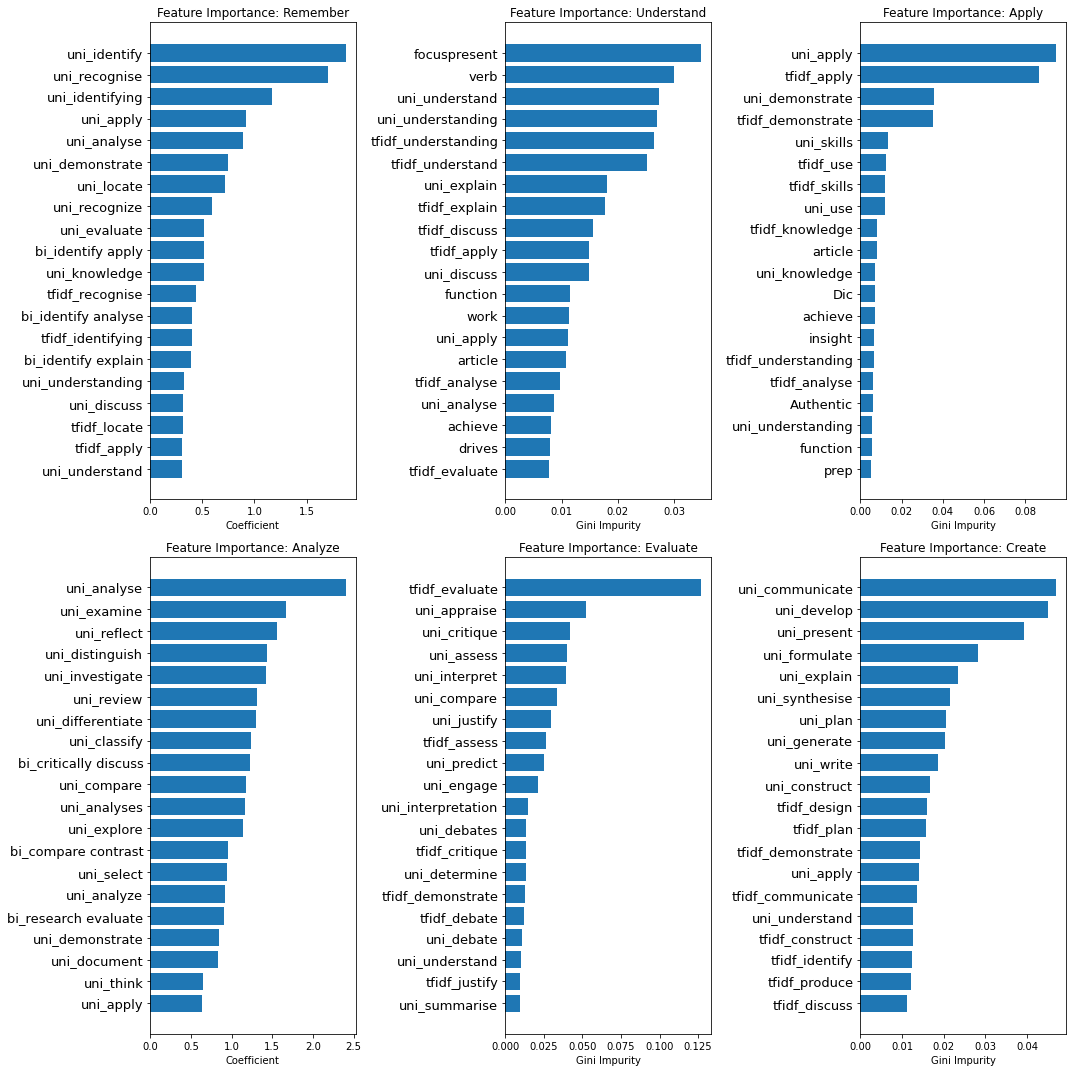

In [120]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(2, 3)

axs[0, 0].set_title('Feature Importance: Remember')
axs[0, 0].barh(range(20), svm_importance_remember[list(reversed(svm_sorted_indices_remember[:20]))], align='center')
axs[0, 0].set_yticks(range(20), df_svm_remember.columns[list(reversed(svm_sorted_indices_remember[:20]))], fontsize=13)
axs[0, 0].set_xlabel('Coefficient')

axs[0, 1].set_title('Feature Importance: Understand')
axs[0, 1].barh(range(20), rf_importance_understand[list(reversed(rf_sorted_indices_understand[:20]))], align='center')
axs[0, 1].set_yticks(range(20), df_rf_understand.columns[list(reversed(rf_sorted_indices_understand[:20]))], fontsize=13)
axs[0, 1].set_xlabel('Gini Impurity')

axs[0, 2].set_title('Feature Importance: Apply')
axs[0, 2].barh(range(20), rf_importance_apply[list(reversed(rf_sorted_indices_apply[:20]))], align='center')
axs[0, 2].set_yticks(range(20), df_rf_apply.columns[list(reversed(rf_sorted_indices_apply[:20]))], fontsize=13)
axs[0, 2].set_xlabel('Gini Impurity')

axs[1, 0].set_title('Feature Importance: Analyze')
axs[1, 0].barh(range(20), svm_importance_analyze[list(reversed(svm_sorted_indices_analyze[:20]))], align='center')
axs[1, 0].set_yticks(range(20), df_svm_analyze.columns[list(reversed(svm_sorted_indices_analyze[:20]))], fontsize=13)
axs[1, 0].set_xlabel('Coefficient')

axs[1, 1].set_title('Feature Importance: Evaluate')
axs[1, 1].barh(range(20), xgb_importance_evaluate[list(reversed(xgb_sorted_indices_evaluate[:20]))], align='center')
axs[1, 1].set_yticks(range(20), df_xgb_evaluate.columns[list(reversed(xgb_sorted_indices_evaluate[:20]))], fontsize=13)
axs[1, 1].set_xlabel('Gini Impurity')

axs[1, 2].set_title('Feature Importance: Create')
axs[1, 2].barh(range(20), xgb_importance_create[list(reversed(xgb_sorted_indices_create[:20]))], align='center')
axs[1, 2].set_yticks(range(20), df_xgb_create.columns[list(reversed(xgb_sorted_indices_create[:20]))], fontsize=13)
axs[1, 2].set_xlabel('Gini Impurity')

fig.tight_layout()
plt.savefig('feature_importance.eps', format='eps', dpi=1200)

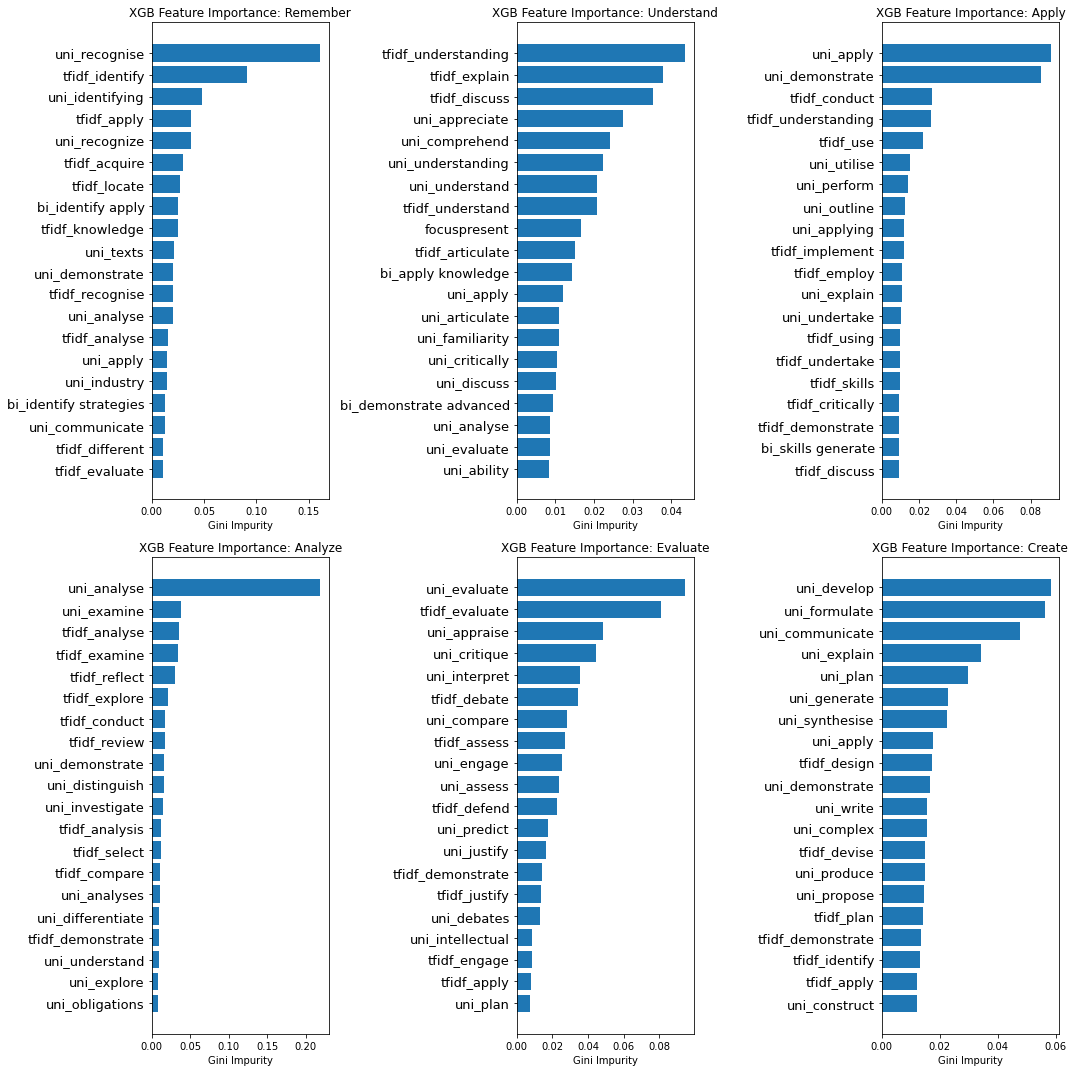

In [180]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(2, 3)

axs[0, 0].set_title('XGB Feature Importance: Remember')
axs[0, 0].barh(range(20), xgb_importance_remember[list(reversed(xgb_sorted_indices_remember[:20]))], align='center')
axs[0, 0].set_yticks(range(20), df_xgb_remember.columns[list(reversed(xgb_sorted_indices_remember[:20]))], fontsize=13)
axs[0, 0].set_xlabel('Gini Impurity')

axs[0, 1].set_title('XGB Feature Importance: Understand')
axs[0, 1].barh(range(20), xgb_importance_understand[list(reversed(xgb_sorted_indices_understand[:20]))], align='center')
axs[0, 1].set_yticks(range(20), df_xgb_understand.columns[list(reversed(xgb_sorted_indices_understand[:20]))], fontsize=13)
axs[0, 1].set_xlabel('Gini Impurity')

axs[0, 2].set_title('XGB Feature Importance: Apply')
axs[0, 2].barh(range(20), xgb_importance_apply[list(reversed(xgb_sorted_indices_apply[:20]))], align='center')
axs[0, 2].set_yticks(range(20), df_xgb_apply.columns[list(reversed(xgb_sorted_indices_apply[:20]))], fontsize=13)
axs[0, 2].set_xlabel('Gini Impurity')

axs[1, 0].set_title('XGB Feature Importance: Analyze')
axs[1, 0].barh(range(20), xgb_importance_analyze[list(reversed(xgb_sorted_indices_analyze[:20]))], align='center')
axs[1, 0].set_yticks(range(20), df_xgb_analyze.columns[list(reversed(xgb_sorted_indices_analyze[:20]))], fontsize=13)
axs[1, 0].set_xlabel('Gini Impurity')

axs[1, 1].set_title('XGB Feature Importance: Evaluate')
axs[1, 1].barh(range(20), xgb_importance_evaluate[list(reversed(xgb_sorted_indices_evaluate[:20]))], align='center')
axs[1, 1].set_yticks(range(20), df_xgb_evaluate.columns[list(reversed(xgb_sorted_indices_evaluate[:20]))], fontsize=13)
axs[1, 1].set_xlabel('Gini Impurity')

axs[1, 2].set_title('XGB Feature Importance: Create')
axs[1, 2].barh(range(20), xgb_importance_create[list(reversed(xgb_sorted_indices_create[:20]))], align='center')
axs[1, 2].set_yticks(range(20), df_xgb_create.columns[list(reversed(xgb_sorted_indices_create[:20]))], fontsize=13)
axs[1, 2].set_xlabel('Gini Impurity')

fig.tight_layout()
plt.savefig('xgb_combined.eps', format='eps', dpi=1200)

In [187]:
a = df_rf_remember.columns[list(reversed(rf_sorted_indices_remember[:20]))]
b = df_rf_understand.columns[list(reversed(rf_sorted_indices_understand[:20]))]
c = df_rf_apply.columns[list(reversed(rf_sorted_indices_apply[:20]))]
d = df_rf_analyze.columns[list(reversed(rf_sorted_indices_analyze[:20]))]
e = df_rf_evaluate.columns[list(reversed(rf_sorted_indices_evaluate[:20]))]
f = df_rf_create.columns[list(reversed(rf_sorted_indices_create[:20]))]
total = list(a) + list(b) + list(c) + list(d) + list(e) + list(f)

In [192]:
a

Index(['Sixltr', 'uni_evaluate', 'ari', 'Dic', 'tfidf_evaluate',
       'uni_understand', 'work', 'uni_apply', 'tfidf_apply', 'Authentic',
       'tfidf_analyse', 'uni_demonstrate', 'tfidf_demonstrate', 'uni_analyse',
       'cogproc', 'insight', 'tfidf_recognise', 'uni_recognise',
       'tfidf_identify', 'uni_identify'],
      dtype='object')

In [190]:
from nltk.probability import FreqDist

In [193]:
FreqDist(total).most_common(10)

[('insight', 6),
 ('work', 5),
 ('tfidf_apply', 5),
 ('uni_demonstrate', 5),
 ('tfidf_demonstrate', 5),
 ('uni_apply', 4),
 ('Authentic', 4),
 ('cogproc', 4),
 ('ari', 3),
 ('Dic', 3)]

In [194]:
a = df_xgb_remember.columns[list(reversed(xgb_sorted_indices_remember[:20]))]
b = df_xgb_understand.columns[list(reversed(xgb_sorted_indices_understand[:20]))]
c = df_xgb_apply.columns[list(reversed(xgb_sorted_indices_apply[:20]))]
d = df_xgb_analyze.columns[list(reversed(xgb_sorted_indices_analyze[:20]))]
e = df_xgb_evaluate.columns[list(reversed(xgb_sorted_indices_evaluate[:20]))]
f = df_xgb_create.columns[list(reversed(xgb_sorted_indices_create[:20]))]
total = list(a) + list(b) + list(c) + list(d) + list(e) + list(f)

In [195]:
FreqDist(total).most_common(10)

[('uni_apply', 4),
 ('uni_demonstrate', 4),
 ('tfidf_demonstrate', 4),
 ('uni_analyse', 3),
 ('tfidf_apply', 3),
 ('tfidf_evaluate', 2),
 ('uni_communicate', 2),
 ('tfidf_analyse', 2),
 ('tfidf_identify', 2),
 ('uni_evaluate', 2)]